# HELP International NGO [Assignment]

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

As a data analyst we need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data Reading and Visualisation

In [2]:
NGO_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# In the data dictionary it is mentioned that the exports, imports and health are in %. Hence treating those columns
var_ = ["exports","imports","health"]
for i in var_:
    NGO_df[i]=NGO_df[i].div(100).round(2)
NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,0.10,0.08,0.45,1610,9.44,56.2,5.82,553
1,Albania,16.6,0.28,0.07,0.49,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,0.38,0.04,0.31,12900,16.10,76.5,2.89,4460
3,Angola,119.0,0.62,0.03,0.43,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,0.46,0.06,0.59,19100,1.44,76.8,2.13,12200


In [4]:
NGO_df.shape

(167, 10)

### Checking the missing values

In [5]:
NGO_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
NGO_df.info()
#There are no missing values to drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
#Checking min and max values of coulmns
NGO_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,0.411078,0.068263,0.468743,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,0.273993,0.027572,0.242194,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.000000,0.020000,0.000000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,0.240000,0.050000,0.300000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,0.350000,0.060000,0.430000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,0.510000,0.090000,0.590000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,2.000000,0.180000,1.740000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Exploring data for outliers

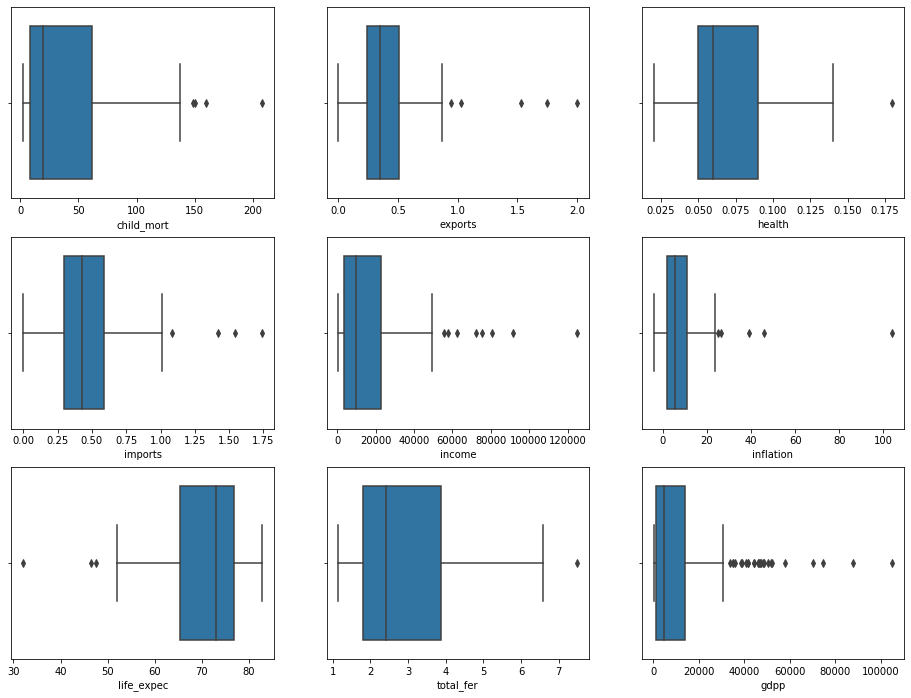

In [8]:
var = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(16,12))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=NGO_df)

###### By referring to the above Boxplot we can see there are outliers in the data for most of the variables like child_mort,exports,imports,income,gdpp etc. Hence here we are not removing the outliers now.
###### Few variables have few outliers hence it will not have much impact on the Analysis and hence keeping as it is.


## Principal Component Analysis

In [9]:
country = NGO_df["country"]

In [10]:
NGO_df_new = NGO_df.drop('country', axis=1)
NGO_df_new.shape

(167, 9)

In [11]:
scaler = StandardScaler()
NGO_df_new1 =scaler.fit_transform(NGO_df_new)

In [12]:
NGO_df_new1.max()

9.129718055281284

In [13]:
NGO_df_new1

array([[ 1.29153238, -1.13876298,  0.42694737, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.4798368 ,  0.06317078, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.1137667 , -1.02815897, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13087164,  0.06317078, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40662278, -0.66438238, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15037371, -0.3006058 , ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [14]:
#Checking Variance
100*(NGO_df_new.var()/sum(NGO_df_new.var())).round(2)

child_mort     0.0
exports        0.0
health         0.0
imports        0.0
income        53.0
inflation      0.0
life_expec     0.0
total_fer      0.0
gdpp          47.0
dtype: float64

In [15]:
from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized', random_state=42)
pca.fit(NGO_df_new1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
pca.components_

array([[-0.41937365,  0.28296047,  0.15336492,  0.16098916,  0.39853994,
        -0.19348999,  0.42568488, -0.40354067,  0.39280487],
       [ 0.18944283,  0.61416416, -0.25296204,  0.66986572,  0.02240217,
        -0.0064852 , -0.2194865 ,  0.15244624, -0.04739022],
       [-0.03790005,  0.14175708, -0.59424696, -0.3020736 ,  0.29347887,
         0.64795782,  0.12082755,  0.01163203,  0.11565822],
       [ 0.37250522,  0.00934784,  0.45138336, -0.07157898,  0.39751785,
         0.1569293 , -0.20574952,  0.3802759 ,  0.53168799],
       [-0.16761656,  0.05376436,  0.52362252,  0.26308415, -0.24873103,
         0.70895636,  0.10426406, -0.13440786, -0.17943678],
       [ 0.20074258, -0.0557362 ,  0.00694991, -0.03297493,  0.16086009,
         0.06507617, -0.6013859 , -0.75064559,  0.01468233],
       [-0.06601685, -0.7073539 , -0.25424267,  0.59003253,  0.09014852,
         0.10237628,  0.02382305,  0.02060763,  0.25082792],
       [-0.67969792, -0.02863587,  0.0676344 , -0.01674889,  0

In [17]:
pca.explained_variance_ratio_

array([0.45971829, 0.1721668 , 0.1297885 , 0.11104337, 0.07246649,
       0.02484789, 0.01266049, 0.00984079, 0.00746738])

Text(0, 0.5, 'Cumulative Variance')

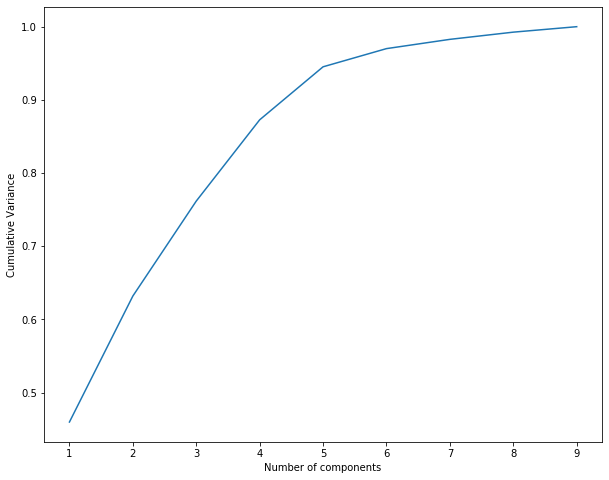

In [18]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance')

In [19]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [20]:
NGO_pca = pca_final.fit_transform(NGO_df_new1)
NGO_pca.shape

(167, 4)

In [21]:
pc = pd.DataFrame(NGO_pca)
pca_df_final = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [22]:
pca_df_final = pd.DataFrame({'country':list(country),'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pca_df_final.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.887628,0.038883,0.843375,1.052367
1,Albania,0.456705,-0.609089,0.404492,-1.116881
2,Algeria,-0.302123,-0.436872,-1.287999,-0.859778
3,Angola,-2.928467,1.682858,-1.449796,0.940502
4,Antigua and Barbuda,1.034798,0.155672,0.172319,-0.852349


## KMeans Clustering

In [23]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
#Hopkins measure to find the data is good for performing clustering
hopkins(pca_df_final.drop('country',axis=1))

0.8549191726964289

###### Above Hopkins measure shows that the data is good for performing Clustering

In [25]:
pca_df_new = pca_df_final.drop('country', axis=1)
pca_df_new.head()

,PC1,PC2,PC3,PC4
0,-2.887628,0.038883,0.843375,1.052367
1,0.456705,-0.609089,0.404492,-1.116881
2,-0.302123,-0.436872,-1.287999,-0.859778
3,-2.928467,1.682858,-1.449796,0.940502
4,1.034798,0.155672,0.172319,-0.852349


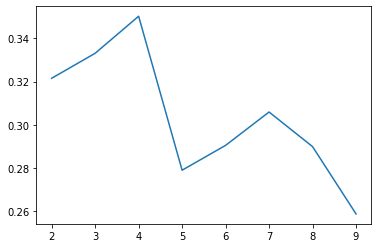

In [26]:
#Finding silhouette_score to check the optimal number of clusters
ss=[]
for k in range(2,10):
    kmean = KMeans(n_clusters =k).fit(pca_df_new)
    ss.append([k,silhouette_score(pca_df_new,kmean.labels_)])
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

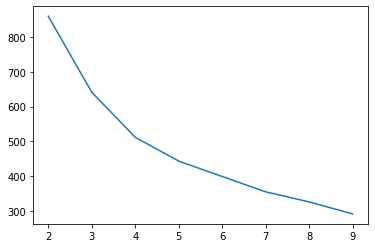

In [27]:
#Plotting Elbow curve and comparing with the silhouette_score graph for optimal cluster numbers.
ssd=[]
for k in range(2,10):
    kmean = KMeans(n_clusters =k).fit(pca_df_new)
    ssd.append([k,kmean.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

###### Comparing above two graphs the optimal number of clusters is 3

### Running Kmeans with the K we selected

In [28]:
kmeans_model = KMeans(n_clusters=3,random_state=50).fit(pca_df_new)

In [29]:
dat_kmean = pd.concat([pca_df_final.reset_index().drop("index",axis=1), pd.Series(kmeans_model.labels_).reset_index().drop("index",axis=1)], axis=1)
dat_kmean.columns=['country','PC1', 'PC2', 'PC3', 'PC4','Cluster ID']
dat_kmean.head()

,country,PC1,PC2,PC3,PC4,Cluster ID
0,Afghanistan,-2.887628,0.038883,0.843375,1.052367,0
1,Albania,0.456705,-0.609089,0.404492,-1.116881,1
2,Algeria,-0.302123,-0.436872,-1.287999,-0.859778,1
3,Angola,-2.928467,1.682858,-1.449796,0.940502,0
4,Antigua and Barbuda,1.034798,0.155672,0.172319,-0.852349,1


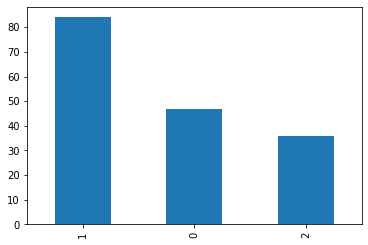

In [30]:
dat_kmean["Cluster ID"].value_counts().plot(kind="bar")

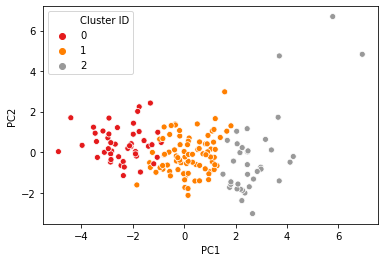

In [31]:
dat_kmeannew =dat_kmean.set_index("country")
sns.scatterplot(x="PC1", y= "PC2", hue ="Cluster ID", data= dat_kmeannew, palette='Set1')

With reference to above scatter plot we can see that clustering looks seemingly fine.

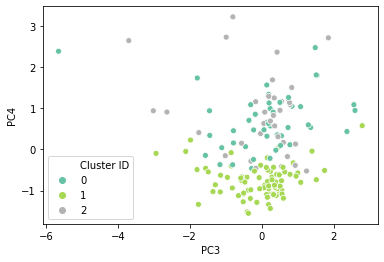

In [32]:
sns.scatterplot(x="PC3", y= "PC4", hue ="Cluster ID", data= dat_kmeannew, palette='Set2')

With reference to above scatter plot we can see that clusters 0 and 2 is not properly clustered.

###### Kmeans Cluster Profiling

In [33]:
clus_prof = pd.merge(NGO_df,dat_kmean[["country", "Cluster ID"]], on= "country")
clus_prof.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
0,Afghanistan,90.2,0.10,0.08,0.45,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,0.28,0.07,0.49,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,0.38,0.04,0.31,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,0.62,0.03,0.43,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,0.46,0.06,0.59,19100,1.44,76.8,2.13,12200,1


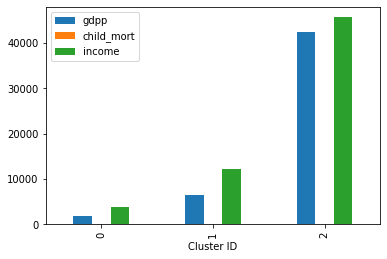

In [34]:
clus_prof[["gdpp","child_mort","income","Cluster ID"]].groupby("Cluster ID").mean().plot(kind="bar")

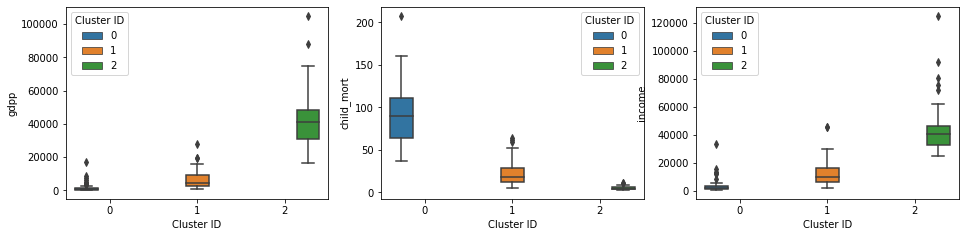

In [35]:
var = ["gdpp","child_mort","income"]
plt.figure(figsize=(16,12))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x="Cluster ID" ,y=i[1], data=clus_prof, hue= "Cluster ID")

###### Kmeans : From the above Box plot the countries having low gdpp,high child_mort and low income is coming under Cluster 0.

In [36]:
Kmeans_output = dat_kmean[dat_kmean["Cluster ID"]==0]["country"]

In [37]:
result = pd.merge(clus_prof, Kmeans_output, how='inner', on='country')
result = result[["country","child_mort","gdpp","income"]] 
result.sort_values(by ="child_mort",  inplace=True, ascending = False)
tp1 = result.nlargest(12, ['child_mort'])  #Top 12 countries with high Infant Mortality rate

In [38]:
tp2 =result.nsmallest(12, ['gdpp']) #Top 12 countries with low GDP

In [39]:
tp3 = result.nsmallest(12, ['income']) #Top 12 countries with low income
res_k = pd.merge(tp1,tp2,how='inner', on='country')
res_k = pd.merge(tp3,res_k,how='inner', on='country')
res_k[["country","child_mort","gdpp","income"]]

,country,child_mort,gdpp,income
0,"Congo, Dem. Rep.",116.0,334,609
1,Niger,123.0,348,814
2,Central African Republic,149.0,446,888
3,Sierra Leone,160.0,399,1220
4,Guinea-Bissau,114.0,547,1390


###### KMeans Clustering conclusion : From the analysis it is found that the Countries that needs focus on are:
Congo, Dem. Rep, 
Niger,
Central African Republic,  
Sierra Leone &
Guinea-Bissau

## Hierarchial Clustering

In [40]:
Feature = pca_df_new
Feature.head()

,PC1,PC2,PC3,PC4
0,-2.887628,0.038883,0.843375,1.052367
1,0.456705,-0.609089,0.404492,-1.116881
2,-0.302123,-0.436872,-1.287999,-0.859778
3,-2.928467,1.682858,-1.449796,0.940502
4,1.034798,0.155672,0.172319,-0.852349


#### Single Linkage

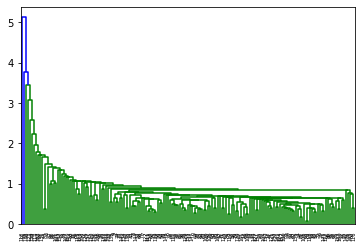

In [41]:
mergings_sinlge = linkage(Feature, method='single', metric='euclidean')
dendrogram(mergings_sinlge)
plt.show()

#### Complete Linkage

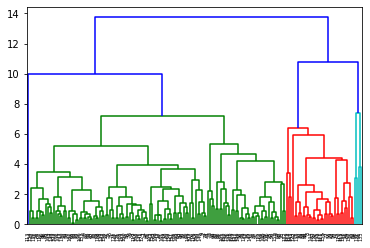

In [42]:
mergings_complete = linkage(Feature, method='complete', metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [43]:
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

#### Cluster Profiling

In [44]:
NGO_DF = NGO_df
NGO_DF["Cluster ID"] = cluster_labels
NGO_DF.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
0,Afghanistan,90.2,0.10,0.08,0.45,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,0.28,0.07,0.49,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,0.38,0.04,0.31,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,0.62,0.03,0.43,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,0.46,0.06,0.59,19100,1.44,76.8,2.13,12200,0


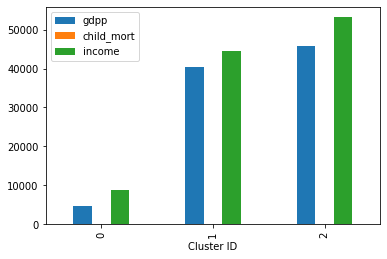

In [45]:
NGO_DF[["gdpp","child_mort","income","Cluster ID"]].groupby("Cluster ID").mean().plot(kind="bar")

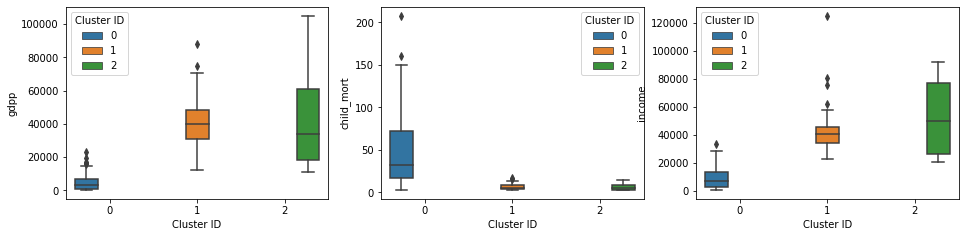

In [46]:
var = ["gdpp","child_mort","income"]
plt.figure(figsize=(16,12))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x="Cluster ID" ,y=i[1], data=NGO_DF, hue= "Cluster ID")

###### Hieararchial clustering : From the above Box plot the countries having low gdpp,high child_mort and low income is coming under Cluster 0.

In [47]:
Hierarchy_output = NGO_DF[NGO_DF["Cluster ID"]==0]["country"]

In [48]:
result_h = pd.merge(NGO_DF, Hierarchy_output, how='inner', on='country')
result_h = result_h[["country","child_mort","gdpp","income"]]
result_h.sort_values(by ="child_mort",  inplace=True, ascending = False)
result_h.min()
top1 =result_h.nlargest(12, ['child_mort']) #Top 12 countries with high Infant Mortality rate

In [49]:
top2 =result_h.nsmallest(12, ['gdpp']) #Top 12 countries with low GDP

In [50]:
top3 = result_h.nsmallest(12, ['income']) #Top 12 countries with low income
res = pd.merge(top1,top2,how='inner', on='country')
res = pd.merge(top3,res,how='inner', on='country')
res[["country","child_mort","gdpp","income"]]

,country,child_mort,gdpp,income
0,"Congo, Dem. Rep.",116.0,334,609
1,Niger,123.0,348,814
2,Central African Republic,149.0,446,888
3,Sierra Leone,160.0,399,1220
4,Guinea-Bissau,114.0,547,1390


###### Hierarchial Clustering conclusion : From the analysis it is found that the Countries that needs focus on are:
Congo, Dem. Rep, 
Niger,
Central African Republic,
Sierra Leone &
Guinea-Bissau